# Machine Learning
## Multiclass classification


### The goal.

Learn how to use and read classification metrics.


### Task 1. Accuracy, recall and precision.

We can enumerate following statistical measures of the classification:
* True positive (TP)  - the sample is properly classified as positive
* False positive (FP) - the sample is wrongly classified as positive
* True negative (TN)  - the sample is properly classified as negative
* False negative (FN) - the sample is wrongly classified as negative

In all previous laboratories accuracy score has been used to measure the classifier performance:

$$
\texttt{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
$$

Read the classification results from `06-enemy.npz` file. This is the result of classifier that detects the enemy. There are two variables:
* `prediction` - the output of the classifier,
* `target` - the expected result.

The value 1 denotes there was an enemy near our radar, the value 0 denote it wasn't an enemy.

**Task**: Calculate the accuracy.


**Question**: Do you think the performence of the classifier is good?


**Task**: Calculate the sensitivity (recall, true positive rate):

$$
\texttt{Sensitivity} = \frac{TP}{TP + FN}
$$

**Question**: What do you think now about the classifier?

**Task**:
Calculate the precision:

$$
\texttt{Precision} = \frac{TP}{TP + FP}
$$

**Task**:
Calculate the specificity (true negative rate):

$$
\texttt{Specificity} = \frac{TN}{TN + FP}
$$

In [1]:
# >>> WRITE YOUR CODE BELOW <<<
import numpy as np

with open('06-enemy.npz', 'rb') as f:
    data = np.load(f)
    predictions, target = data['predictions'], data['target']

In [2]:
def metrics(pred, target):
    total = len(target)
    TP = 0
    TN = 0
    FP = 0
    FN = 0
    for i in range(total):
        pred_sample = pred[i]
        target_sample = target[i]
        if target_sample == 1:
            if pred_sample == 1:
                TP += 1
            else:
                FP += 1
        else:
            if pred_sample == 1:
                FN += 1
            else:
                TN += 1

    accuracy = (TP + TN) / (TP + TN + FP + FN)
    sensitivity = TP / (TP + FN)
    precision = TP / (TP + FP)
    specificity = TN / (TN + FP)

    return accuracy, sensitivity, precision, specificity

In [3]:
accuracy, sensitivity, precision, specificity = metrics(predictions, target)

print(f"{accuracy = }")
print(f"{sensitivity = }")
print(f"{precision = }")
print(f"{specificity = }")

accuracy = 0.981
sensitivity = 0.980980980980981
precision = 1.0
specificity = 1.0


### Task 2: Confusion matrix.

The confusion matrix helps to visualize the classifier performance in table. Each row of the matrix represents the predicted class, while each column represents the ground truth (the actual class).

In [4]:
import numpy as np

with open('06-animals.npz', 'rb') as f:
    data = np.load(f)
    predictions, target, classes = data['predictions'], data['target'], data['classes']

# Adding the first class
classes = np.insert(classes, 0, '', axis=0)

<ipython-input-5-60bed285819d>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(classes)
<ipython-input-5-60bed285819d>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(classes)


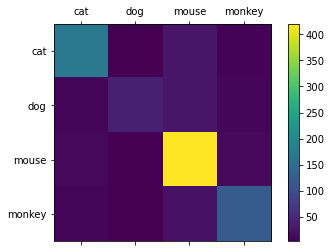

[[170   4  28   7]
 [ 10  39  29   8]
 [ 12   4 420  13]
 [  8   3  23 122]]


In [5]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import sklearn.model_selection
from sklearn.metrics import plot_confusion_matrix
from sklearn.svm import SVC

confusion_matrix = confusion_matrix(predictions, target)

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(confusion_matrix, interpolation='nearest')
fig.colorbar(cax)
plt.show()
print(confusion_matrix)